In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time

### MNIST digits classification dataset
[Data Types](https://keras.io/api/datasets/mnist/)
* x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
* y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
* x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
* y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Linearise
x_train = x_train.reshape(60000, 784)/255.0
x_test = x_test.reshape(10000, 784)/255.0
# One Hot Encoding
y_train_1hot = to_categorical(y_train, 10)
y_test_1hot = to_categorical(y_test, 10)

### Model

* Erste Schicht 15700 W: 784 x 20 W + 20 Bias 
* Zweite Schicht 210: 20 x 10W + 10 Bias

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, 
                input_dim=784, 
                activation='softmax', dtype=np.float16))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Compile

In [5]:
sgd = SGD(learning_rate = 0.1)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['acc'])

### Fit

In [6]:
start_time = time.time()
epochs = 50
history = model.fit(x_train, y_train_1hot, 
                     epochs=epochs,
                     batch_size=32,
                     verbose=0,
                     validation_data = (x_test, y_test_1hot))

duration = time.time() - start_time
print(f'TRAININGSDAUER: {duration:.2f} Sek.')

TRAININGSDAUER: 1237.01 Sek.


### Evaluation

In [7]:
def set_subplot(ax, y_label, traindata, testdata, ylim):
    e_range = range(1, epochs + 1)
    ax.plot(e_range, traindata, 'b', label='Training')
    ax.plot(e_range, testdata, 'g', label='Test')
    ax.set_xlabel('Epochen')
    ax.set_ylabel(y_label)
    ax.legend()
    ax.grid()
    ax.set_ylim(ylim)
    ax.set_title(y_label)

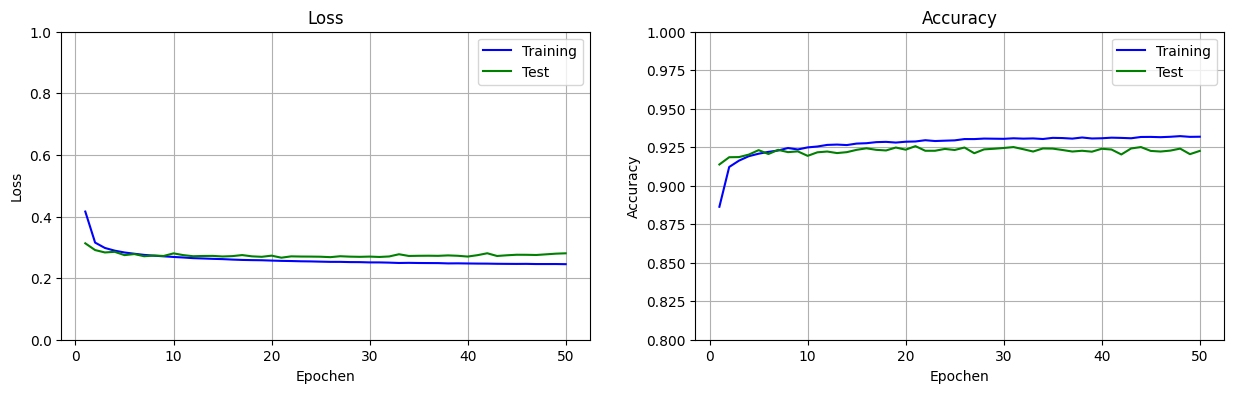

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

set_subplot(ax[0], 'Loss', history.history['loss'], 
            history.history['val_loss'], [0, 1])
set_subplot(ax[1], 'Accuracy', history.history['acc'], 
            history.history['val_acc'], [0.8, 1])
plt.show()

In [9]:
loss, acc = model.evaluate(x_test, y_test_1hot)
print(f"Evaluation auf den Testdaten:\n\nLoss = {loss:.3f}\nAccuracy = {acc:.3f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.2805 - acc: 0.9226
Evaluation auf den Testdaten:

Loss = 0.281
Accuracy = 0.923


### Save and load
[https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)

In [15]:
model.save('./saved_model/nn')

INFO:tensorflow:Assets written to: ./saved_model/nn/assets


### Print Weights

In [11]:
for layer in model.layers:
    print('-'*100)
    print(layer.name)
    print('-'*100)
    print(layer.weights)
    print('-'*100)
    print(layer.bias.numpy())
    print('-'*100)
    print(layer.bias_initializer)

----------------------------------------------------------------------------------------------------
dense
----------------------------------------------------------------------------------------------------
[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float16, numpy=
array([[ 0.05554  ,  0.02545  ,  0.03308  , ...,  0.0803   , -0.0767   ,
         0.02069  ],
       [-0.05142  , -0.014404 , -0.06146  , ..., -0.03717  , -0.081    ,
        -0.006775 ],
       [-0.01764  , -0.01544  , -0.0467   , ..., -0.02463  ,  0.00714  ,
         0.0801   ],
       ...,
       [ 0.05383  , -0.02716  ,  0.04504  , ..., -0.04364  ,  0.04468  ,
         0.0803   ],
       [ 0.005432 , -0.07367  , -0.07794  , ..., -0.03088  ,  0.074    ,
         0.04565  ],
       [-0.0813   , -0.04294  , -0.0001831, ...,  0.0709   ,  0.073    ,
        -0.00525  ]], dtype=float16)>, <tf.Variable 'dense/bias:0' shape=(10,) dtype=float16, numpy=
array([-0.665 ,  1.218 ,  0.2483, -0.611 ,  0.3572,  2.47  , -0.117